<a href="https://colab.research.google.com/github/jdidoutourayaencg-cpu/DS/blob/main/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset offers a detailed, non-commercial record of NVIDIA Corporation’s (NVDA) daily stock market activity over the past five years, sourced from reliable financial platforms such as Yahoo Finance. It includes essential trading metrics—such as opening, closing, highest, and lowest prices, adjusted close values, and daily trading volume—captured for each market day between the start date five years ago and the most recent available trading session. With NVIDIA being a major player in the technology sector and a key innovator in GPU development, the dataset provides valuable insight into the company’s market performance and investor behavior. Its structure makes it suitable for a wide range of financial analyses, including historical and technical studies, machine learning–based forecasting, volatility assessment, and the evaluation of trading strategies. By offering a consistent and comprehensive view of NVDA stock trends, this dataset serves as an excellent resource for analysts, researchers, students, and investors seeking to explore market dynamics or understand how external events and corporate actions influence stock price movements.

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NVDA/NVDA(2).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000
...,...,...,...,...,...,...,...
1255,2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100
1256,2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400
1257,2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600
1258,2024-05-22,954.590027,960.200012,932.489990,949.500000,949.500000,53725900


In [ ]:
df.shape

(1260, 7)

In [ ]:
#Checking for Duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#Removing Duplicates
df=df.drop_duplicates()

In [ ]:
#Checking for null values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,236.259629,240.632726,231.748678,236.457376,236.246529,4.549841e+07
std,203.974380,207.537564,200.074702,204.085654,204.154064,1.842901e+07
min,33.977501,34.367500,33.150002,33.445000,33.255783,9.788400e+06
25%,116.956251,121.027501,114.323750,116.508123,116.403095,3.235795e+07
50%,168.160004,171.879997,164.275002,169.110001,169.027069,4.278820e+07
75%,277.930008,283.807510,272.702507,278.057495,277.813087,5.514575e+07
max,1020.000000,1063.199951,1015.200012,1058.918579,1058.918579,1.543911e+08


In this dataset, the Date column is stored as an object (string) data type, so it should be converted into a proper datetime format to allow time-series analysis and efficient filtering. The numerical attributes—Open, High, Low, Close, Adj Close, and Volume—represent daily trading information and should be ensured as numerical (float or integer) data types to enable statistical calculations, visualizations, and modeling. Converting the Date column to datetime and validating numeric columns is essential for performing tasks such as trend analysis, volatility measurement, and predictive modeling. Once formatted correctly, the dataset becomes fully ready for use in machine-learning pipelines, technical analysis, and financial studies involving NVIDIA's stock performance over the past five years

In [ ]:
# Convert the Date column from object to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Ensure all price-related columns are in numeric format
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Optional: Sort by date just like in time-series preprocessing
df = df.sort_values(by='Date').reset_index(drop=True)


In [ ]:
#Let's check what's happened now
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000
...,...,...,...,...,...,...,...
1255,2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100
1256,2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400
1257,2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600
1258,2024-05-22,954.590027,960.200012,932.489990,949.500000,949.500000,53725900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   Open       1260 non-null   float64       
 2   High       1260 non-null   float64       
 3   Low        1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Adj Close  1260 non-null   float64       
 6   Volume     1260 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


Text(0, 0.5, 'Frequency')

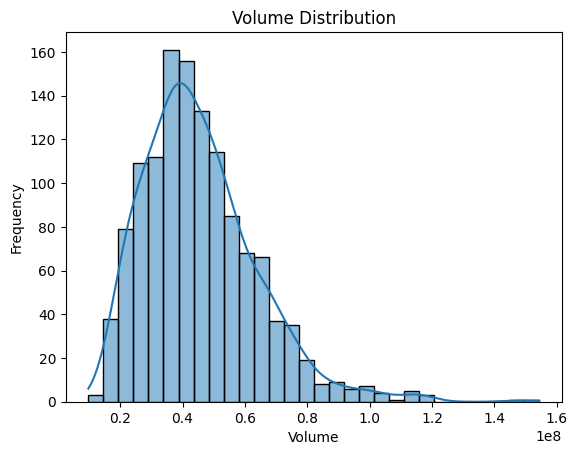

In [ ]:
# Let's check the distribution of the Volume variable.
sns.histplot(df['Volume'], bins=30, kde=True)
plt.title('Volume Distribution');
plt.xlabel('Volume')
plt.ylabel('Frequency')


Text(0, 0.5, 'Count')

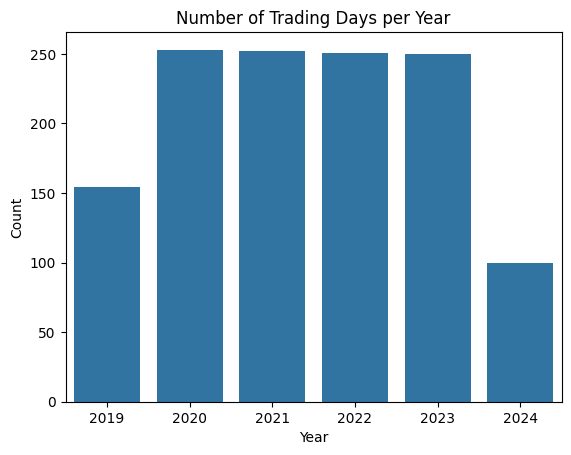

In [ ]:
# Let's check the distribution of the data entries by year.
df['Year'] = df['Date'].dt.year
sns.countplot(x='Year', data=df)
plt.title('Number of Trading Days per Year');
plt.xlabel('Year')
plt.ylabel('Count')


In [ ]:
# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Check the distribution of trading days per year
df['Year'].value_counts()


,count
Year,
2020,253
2021,252
2022,251
2023,250
2019,154
2024,100


In [ ]:
# Function for plotting grouped bar charts in NVDA dataset
def plot(col, df=df):
    return df.groupby(col)['Close'].mean().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='Year'>

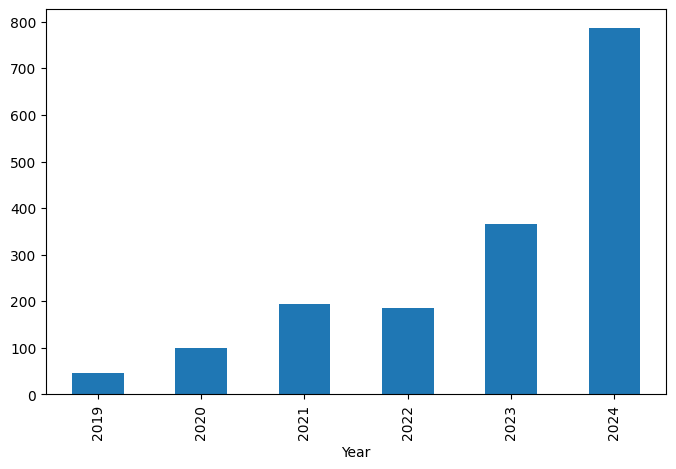

In [ ]:
plot('Year')


In [ ]:
#Finding Correlation
cn=df_new.corr()
cn

,Date,Close,Volume,Year
Date,1.000000,0.808059,0.160259,0.981680
Close,0.808059,1.000000,0.092182,0.806651
Volume,0.160259,0.092182,1.000000,0.183293
Year,0.981680,0.806651,0.183293,1.000000


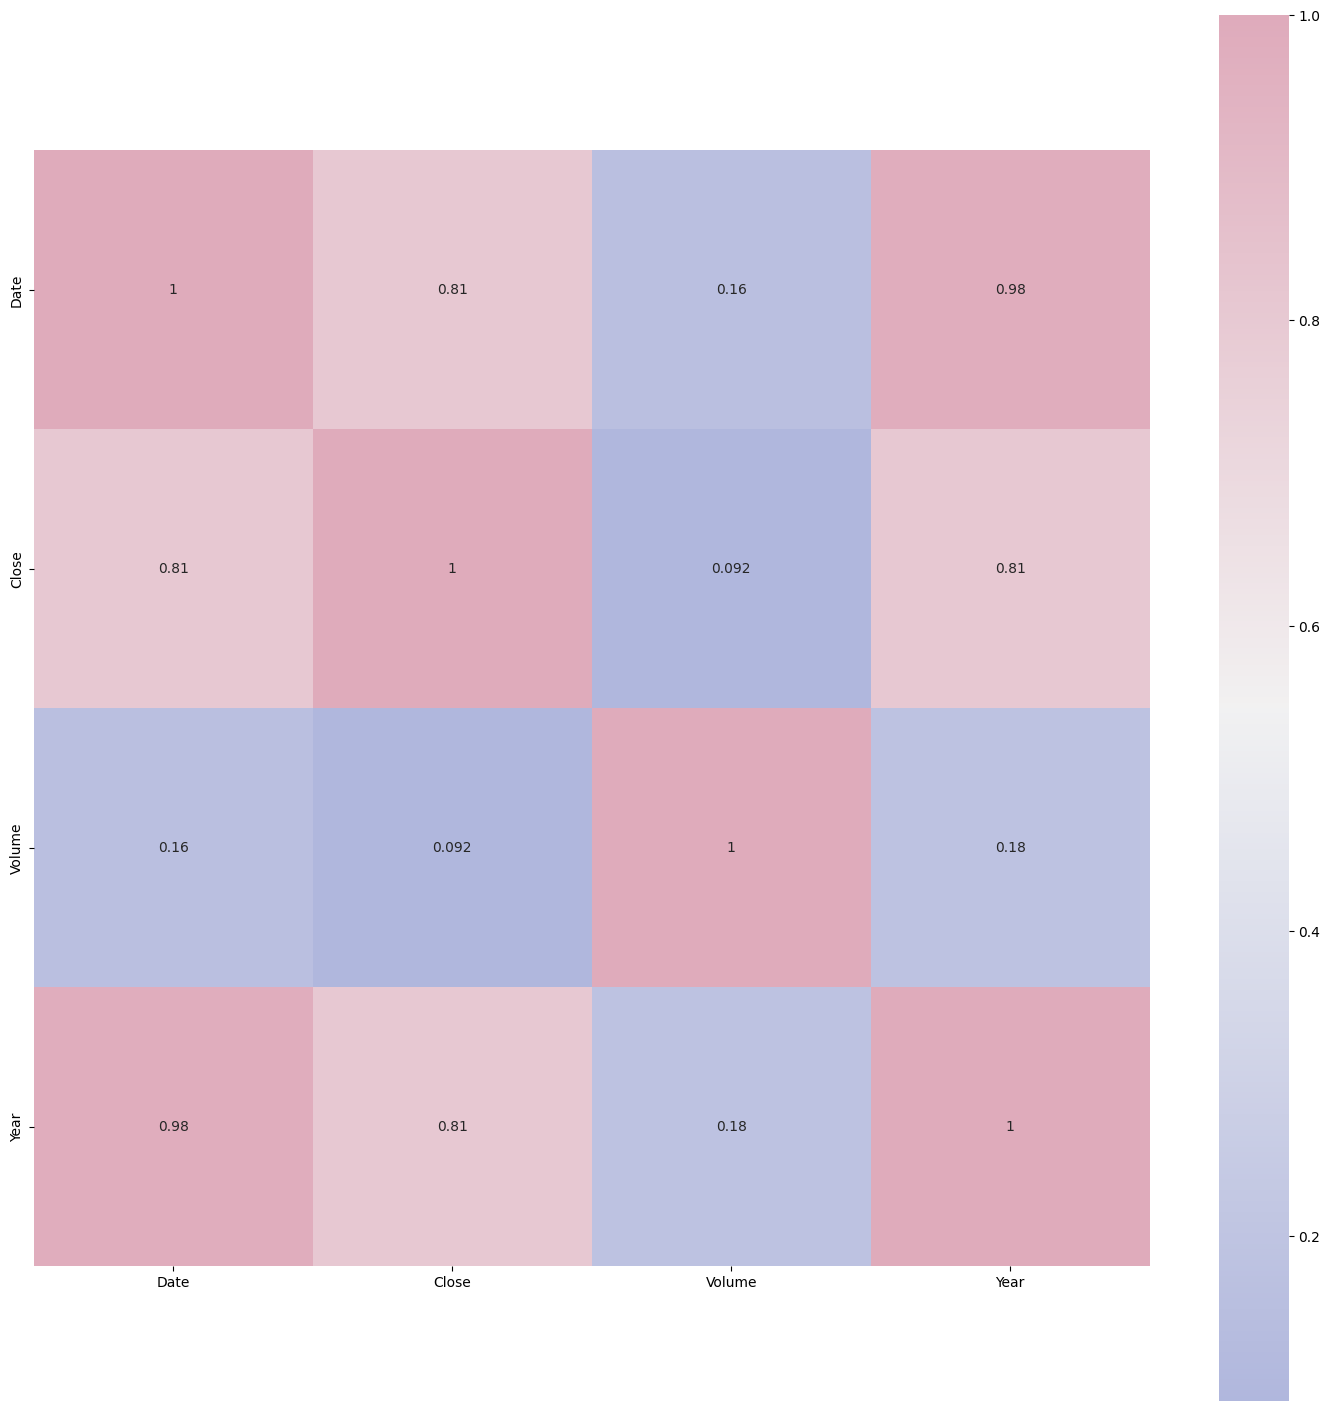

In [ ]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

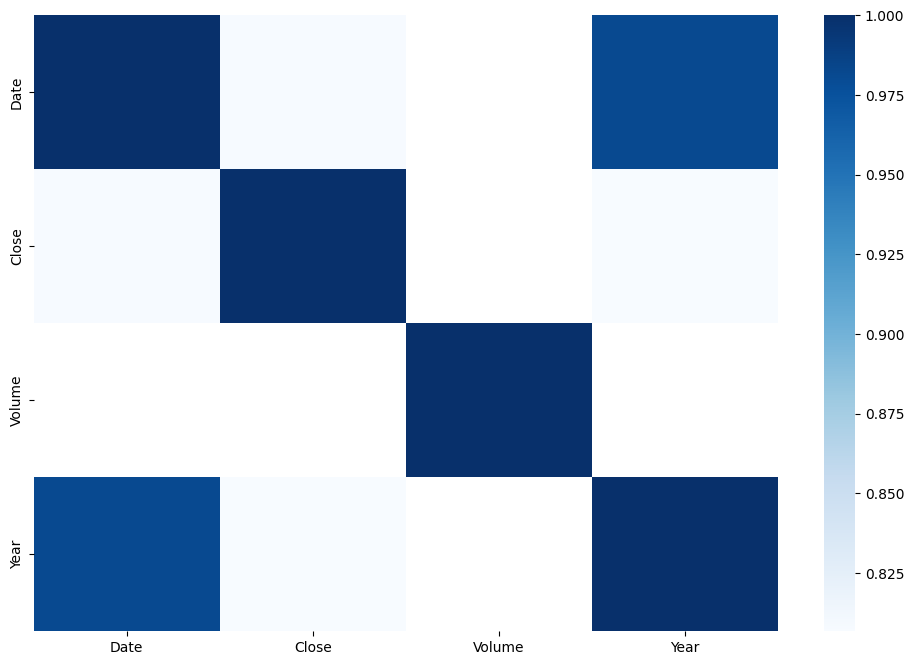

In [ ]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

NameError: name 'X' is not defined

In [9]:
import pandas as pd

# Re-load df and perform necessary preprocessing to ensure it's defined
df = pd.read_csv('/content/drive/MyDrive/NVDA/NVDA(2).csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Ensure all price-related columns are in numeric format
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Sort by date
df = df.sort_values(by='Date').reset_index(drop=True)

# Now, create the new column
df['Open_Close_Product'] = df['Open'] * df['Close']
display(df.head())

,Date,Open,High,Low,Close,Adj Close,Volume,Open_Close_Product
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400,1378.270787
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400,1343.363176
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600,1306.632113
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000,1240.342462
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000,1219.907721


In [12]:
# Splitting independent and dependent variables
X = df.drop('Close', axis=1)
y = df['Close']

print("Independent variables (X) head:")
display(X.head())

print("\nDependent variable (y) head:")
display(y.head())

Independent variables (X) head:


,Date,Open,High,Low,Adj Close,Volume,Open_Close_Product
0,2019-05-23,37.422501,37.422501,36.227501,36.579872,59184400,1378.270787
1,2019-05-24,37.020000,37.375000,36.220001,36.041054,35758400,1343.363176
2,2019-05-28,36.465000,36.794998,35.812500,35.589134,42835600,1306.632113
3,2019-05-29,35.352501,35.705002,34.735001,34.846722,55980000,1240.342462
4,2019-05-30,35.077499,35.437500,34.392502,34.580738,39430000,1219.907721



Dependent variable (y) head:


,Close
0,36.830002
1,36.287498
2,35.832500
3,35.084999
4,34.777500


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1008, 7)
Shape of X_test: (252, 7)
Shape of y_train: (1008,)
Shape of y_test: (252,)


In [14]:
len(X)

1260

In [15]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [20]:
#Fitting training data to the model
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [21]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([ 33.93655858, 142.6423684 ,  38.51992817, 269.67572264,
        78.58957817,  38.33061544, 127.38160705, 169.58813187,
       125.2713747 , 226.19885129, 226.81535907, 476.70683189,
       198.1558751 , 130.7148022 , 188.44843965, 242.41769813,
       170.4007271 , 475.79432843,  43.20231593, 187.87106665,
       195.50057325,  53.06354851, 264.4263411 , 145.21030256,
       481.81133403,  61.42153897, 115.99914337, 305.44224645,
       129.93547556, 277.79605419,  63.01210493, 183.3861043 ,
       790.8582684 ,  43.73531038, 858.16607871, 303.63767802,
       232.93721784, 159.91786616, 153.55811894, 114.32004934,
        92.34197515, 430.99293633, 596.57836345, 674.74261422,
       159.18966634,  36.30768001, 563.90949944, 417.93556264,
        56.05725738, 178.51959648, 229.82097619,  74.45991009,
       435.2867943 ,  37.92267926, 301.76620456, 124.51945293,
       454.94404763, 407.92583405,  42.13737403,  58.12411221,
       112.21228284, 169.96392152, 421.09778814, 132.99

In [25]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_lr_pred)
mse = mean_squared_error(y_test, y_lr_pred)
rmse = np.sqrt(mse) # RMSE is the square root of MSE
r2 = r2_score(y_test, y_lr_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09
R-squared (R2 Score): 1.00


In [27]:
#Fitting training data to the model with DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_regressor_model = DecisionTreeRegressor(random_state=0)
dt_regressor_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [29]:
#Predicting result using testing data
y_dt_pred = dt_regressor_model.predict(X_test)
display(y_dt_pred[:5])

array([ 33.445   , 142.649994,  38.165001, 270.420013,  77.800003])

In [32]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_dt = mean_absolute_error(y_test, y_dt_pred)
mse_dt = mean_squared_error(y_test, y_dt_pred)
rmse_dt = np.sqrt(mse_dt) # RMSE is the square root of MSE
r2_dt = r2_score(y_test, y_dt_pred)

print(f"Decision Tree Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared (R2 Score): {r2_dt:.2f}")

Decision Tree Regressor Metrics:
Mean Absolute Error (MAE): 1.09
Mean Squared Error (MSE): 7.50
Root Mean Squared Error (RMSE): 2.74
R-squared (R2 Score): 1.00


In [34]:
#Fitting K-NN Regressor to the training set
from sklearn.neighbors import KNeighborsRegressor
knn_regressor_model = KNeighborsRegressor(n_neighbors=5)
knn_regressor_model.fit(X_train, y_train)

KNeighborsRegressor()

In [38]:
#Fitting Support Vector Regressor to the training set
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [37]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_knn = mean_absolute_error(y_test, y_knn_pred)
mse_knn = mean_squared_error(y_test, y_knn_pred)
rmse_knn = np.sqrt(mse_knn) # RMSE is the square root of MSE
r2_knn = r2_score(y_test, y_knn_pred)

print(f"K-Nearest Neighbors Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R-squared (R2 Score): {r2_knn:.2f}")

K-Nearest Neighbors Regressor Metrics:
Mean Absolute Error (MAE): 105.69
Mean Squared Error (MSE): 21952.02
Root Mean Squared Error (RMSE): 148.16
R-squared (R2 Score): 0.50


In [36]:
#Predicting result using testing data
y_knn_pred = knn_regressor_model.predict(X_test)
display(y_knn_pred[:5])

array([179.062497 , 129.223999 ,  97.8174996, 124.0849962, 201.079502 ])

In [39]:
# Predicting results using testing data with SVR
y_svr_pred = svr_model.predict(X_test)
display(y_svr_pred[:5])

array([163.28482332, 152.41007416, 161.8161147 , 164.65231253,
       171.66207717])

In [48]:
import pandas as pd

metrics = {
    'Model': [
        'Linear Regression',
        'Decision Tree Regressor',
        'K-Nearest Neighbors Regressor',
        'Support Vector Regressor',
        'Random Forest Regressor',
        'Gradient Boosting Regressor'
    ],
    'MAE': [
        mae, mae_dt, mae_knn, mae_svr, mae_rf, mae_gbr
    ],
    'MSE': [
        mse, mse_dt, mse_knn, mse_svr, mse_rf, mse_gbr
    ],
    'RMSE': [
        rmse, rmse_dt, rmse_knn, rmse_svr, rmse_rf, rmse_gbr
    ],
    'R2 Score': [
        r2, r2_dt, r2_knn, r2_svr, r2_rf, r2_gbr
    ]
}

metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.set_index('Model')

print("\n--- Regression Model Performance Summary ---")
display(metrics_df.round(2))


--- Regression Model Performance Summary ---


,MAE,MSE,RMSE,R2 Score
Model,,,,
Linear Regression,0.08,0.01,0.09,1.00
Decision Tree Regressor,1.09,7.50,2.74,1.00
K-Nearest Neighbors Regressor,105.69,21952.02,148.16,0.50
Support Vector Regressor,138.94,50863.16,225.53,-0.16
Random Forest Regressor,0.93,7.91,2.81,1.00
Gradient Boosting Regressor,1.41,10.50,3.24,1.00


In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_svr = mean_absolute_error(y_test, y_svr_pred)
mse_svr = mean_squared_error(y_test, y_svr_pred)
rmse_svr = np.sqrt(mse_svr) # RMSE is the square root of MSE
r2_svr = r2_score(y_test, y_svr_pred)

print(f"Support Vector Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared (R2 Score): {r2_svr:.2f}")

Support Vector Regressor Metrics:
Mean Absolute Error (MAE): 138.94
Mean Squared Error (MSE): 50863.16
Root Mean Squared Error (RMSE): 225.53
R-squared (R2 Score): -0.16


In [41]:
#Fitting Random Forest Regressor to the training set
from sklearn.ensemble import RandomForestRegressor
rf_regressor_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf) # RMSE is the square root of MSE
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2 Score): {r2_rf:.2f}")

Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 0.93
Mean Squared Error (MSE): 7.91
Root Mean Squared Error (RMSE): 2.81
R-squared (R2 Score): 1.00


In [42]:
#Predicting result using testing data
y_rf_pred = rf_regressor_model.predict(X_test)
display(y_rf_pred[:5])

array([ 34.32114991, 142.77801983,  38.08825041, 270.48080328,
        77.08267529])

In [44]:
#Fitting Gradient Boosting Regressor to the training set
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [47]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_gbr = mean_absolute_error(y_test, y_gbr_pred)
mse_gbr = mean_squared_error(y_test, y_gbr_pred)
rmse_gbr = np.sqrt(mse_gbr) # RMSE is the square root of MSE
r2_gbr = r2_score(y_test, y_gbr_pred)

print(f"Gradient Boosting Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"R-squared (R2 Score): {r2_gbr:.2f}")

Gradient Boosting Regressor Metrics:
Mean Absolute Error (MAE): 1.41
Mean Squared Error (MSE): 10.50
Root Mean Squared Error (RMSE): 3.24
R-squared (R2 Score): 1.00


In [45]:
#Predicting result using testing data
y_gbr_pred = gbr_model.predict(X_test)
display(y_gbr_pred[:5])

array([ 34.84290817, 143.64960512,  38.32373674, 269.37168033,
        76.8923264 ])

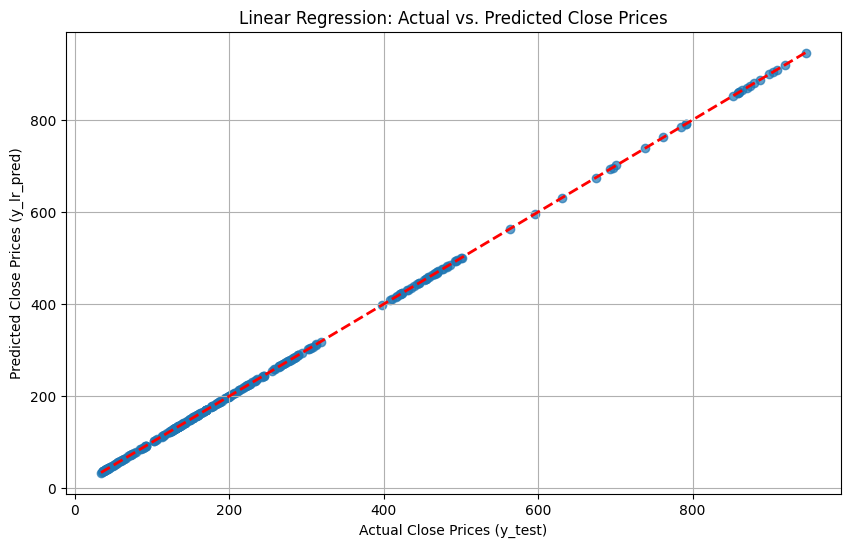

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lr_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Close Prices (y_test)')
plt.ylabel('Predicted Close Prices (y_lr_pred)')
plt.title('Linear Regression: Actual vs. Predicted Close Prices')
plt.grid(True)
plt.show()

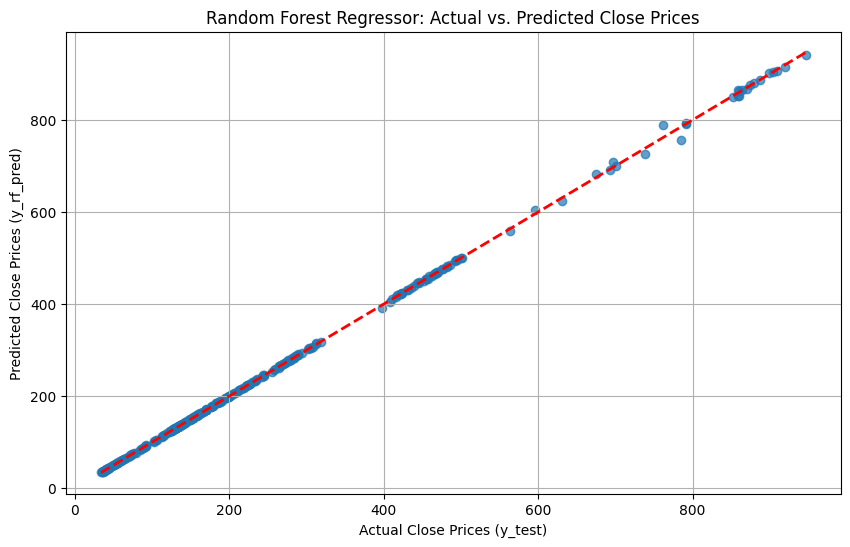

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Close Prices (y_test)')
plt.ylabel('Predicted Close Prices (y_rf_pred)')
plt.title('Random Forest Regressor: Actual vs. Predicted Close Prices')
plt.grid(True)
plt.show()

In [54]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [55]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([ 34.697155, 141.96776 ,  38.1381  , 268.61475 ,  78.103836,
        38.003967, 126.84703 , 170.16113 , 124.65121 , 225.41891 ,
       225.35794 , 476.06863 , 197.73311 , 131.34697 , 188.7457  ,
       243.10658 , 170.70627 , 477.907   ,  43.280422, 188.60056 ,
       196.29156 ,  53.167667, 264.52975 , 144.12534 , 479.5996  ,
        61.424324, 117.68383 , 309.49734 , 129.7447  , 278.9636  ,
        62.667496, 182.34018 , 805.50916 ,  43.954666, 865.11456 ,
       301.9988  , 233.23857 , 159.85123 , 153.35329 , 113.08976 ,
        91.93098 , 430.40588 , 576.0663  , 605.30084 , 159.15436 ,
        35.818752, 535.8855  , 421.62082 ,  54.66994 , 179.15472 ,
       229.13695 ,  73.74085 , 435.33597 ,  38.24352 , 299.11853 ,
       123.826935, 457.80545 , 405.5829  ,  41.514782,  59.621426,
       112.382195, 170.81409 , 418.442   , 134.33052 , 129.97905 ,
       152.95183 , 263.26294 , 223.04518 , 468.7626  , 416.67407 ,
        59.621426,  73.052605, 429.17908 ,  36.769352,  54.565

In [57]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_xgb = mean_absolute_error(y_test, y_xgb_pred)
mse_xgb = mean_squared_error(y_test, y_xgb_pred)
rmse_xgb = np.sqrt(mse_xgb) # RMSE is the square root of MSE
r2_xgb = r2_score(y_test, y_xgb_pred)

print(f"XGBoost Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R2 Score): {r2_xgb:.2f}")

XGBoost Regressor Metrics:
Mean Absolute Error (MAE): 2.77
Mean Squared Error (MSE): 98.78
Root Mean Squared Error (RMSE): 9.94
R-squared (R2 Score): 1.00


In [59]:
#Training a neural network model
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=42)

In [60]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([ 102.74319389,   87.45743804,   98.43108102,  177.68085162,
        186.9079544 ,   87.53857336,   88.65364111,  177.60700034,
        121.96258389,  127.35679384,   96.33636458,  329.32271329,
        164.31769148,   71.75340306,  197.83305508,  193.21240021,
        133.43503774,  321.90137642,   83.8598754 ,  204.71634068,
        165.24678104,  152.71205418,  256.679765  ,   67.97506155,
        357.22133349,  211.08282603,  186.10837231,  282.25843353,
         92.1258863 ,  263.93270333,   86.02340358,  147.75714419,
        822.0613833 ,   65.65949632,  896.49170348,  199.27369241,
        206.66581518,  143.56199244,   76.48422788,  131.87896605,
        113.1404253 ,  302.33164956,  503.60671987,  678.39126975,
        193.10229856,   94.28188251,  450.08297951,  291.42812865,
        107.82618567,  288.76971563,  160.18137353,   88.16459326,
        326.03615402,   73.61763385,  221.21551801,  221.07663357,
        317.37205149,  307.10558851,   91.1609321 ,   69.17359

In [64]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_mlp = mean_absolute_error(y_test, y_mlp_pred)
mse_mlp = mean_squared_error(y_test, y_mlp_pred)
rmse_mlp = np.sqrt(mse_mlp) # RMSE is the square root of MSE
r2_mlp = r2_score(y_test, y_mlp_pred)

print(f"MLP Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_mlp:.2f}")
print(f"Mean Squared Error (MSE): {mse_mlp:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp:.2f}")
print(f"R-squared (R2 Score): {r2_mlp:.2f}")

MLP Regressor Metrics:
Mean Absolute Error (MAE): 67.78
Mean Squared Error (MSE): 6743.46
Root Mean Squared Error (RMSE): 82.12
R-squared (R2 Score): 0.85


In [66]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [67]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array([ 34.95032872, 143.64960512,  38.32373674, 269.37168033,
        76.8923264 ,  38.45285447, 127.49420122, 171.71931182,
       125.20248571, 226.53773155, 225.98257512, 476.12935871,
       198.35349721, 130.58318561, 187.7331478 , 242.2250945 ,
       171.72275202, 476.14625683,  43.57070631, 187.7331478 ,
       196.22609948,  52.69690917, 264.85180961, 143.6867064 ,
       480.14221312,  61.16788085, 115.83596013, 304.85091632,
       130.45917418, 277.6096173 ,  64.09070094, 185.72106469,
       786.82162208,  43.6066248 , 856.02066135, 304.79638227,
       233.00656102, 158.82346251, 153.4045314 , 115.83596013,
        94.03197074, 429.97758251, 608.90956901, 681.9901263 ,
       157.54009269,  36.70049589, 560.51811145, 419.62289165,
        55.48263354, 177.52356269, 229.94794278,  76.90922451,
       434.80376261,  37.96280878, 301.85425653, 125.17959151,
       454.70897924, 409.52463559,  42.37208197,  59.3090105 ,
       110.36611368, 171.71931182, 422.90100122, 133.31

In [69]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_gb = mean_absolute_error(y_test, y_gb_pred)
mse_gb = mean_squared_error(y_test, y_gb_pred)
rmse_gb = np.sqrt(mse_gb) # RMSE is the square root of MSE
r2_gb = r2_score(y_test, y_gb_pred)

print(f"Gradient Boosting Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared (R2 Score): {r2_gb:.2f}")

Gradient Boosting Regressor Metrics:
Mean Absolute Error (MAE): 1.25
Mean Squared Error (MSE): 4.95
Root Mean Squared Error (RMSE): 2.22
R-squared (R2 Score): 1.00


In [72]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np # Import numpy

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Drop the 'Date' column from X for cross-validation as models require numerical input
X_numeric = X.drop('Date', axis=1)

# Linear regression model
lr_model_scores = cross_val_score(lr_model,X_numeric, y, cv=kf)

# Decision tree regressor model
dt_model_scores = cross_val_score(dt_regressor_model,X_numeric, y, cv=kf)

# KNN regressor model
knn_model_scores = cross_val_score(knn_regressor_model,X_numeric, y, cv=kf)

# Support Vector Regressor model
svr_model_scores = cross_val_score(svr_model,X_numeric, y, cv=kf)

# Random forest regressor model
rf_model_scores = cross_val_score(rf_regressor_model,X_numeric, y, cv=kf)

# XGBoost regressor model
xgb_model_scores = cross_val_score(xgb_model,X_numeric, y, cv=kf)

# Multi-layer perceptron regressor model
mlp_model_scores = cross_val_score(mlp_model,X_numeric, y, cv=kf)

# Gradient boost regressor model
gb_model_scores = cross_val_score(gbr_model,X_numeric, y, cv=kf)


print("Linear regression models' average R2 score:", np.mean(lr_model_scores))
print("Decision tree regressor models' average R2 score:", np.mean(dt_model_scores))
print("KNN regressor models' average R2 score:", np.mean(knn_model_scores))
print("Support Vector Regressor models' average R2 score:", np.mean(svr_model_scores))
print("Random forest regressor models' average R2 score:", np.mean(rf_model_scores))
print("XGBoost regressor models' average R2 score:", np.mean(xgb_model_scores))
print("Multi-layer perceptron regressor models' average R2 score:", np.mean(mlp_model_scores))
print("Gradient boost regressor models' average R2 score:", np.mean(gb_model_scores))

Linear regression models' average R2 score: 0.9999997753500729
Decision tree regressor models' average R2 score: 0.9996855874469383
KNN regressor models' average R2 score: 0.5402162790586608
Support Vector Regressor models' average R2 score: -0.11137267767187384
Random forest regressor models' average R2 score: 0.9996961093240273
XGBoost regressor models' average R2 score: 0.9991077009785752
Multi-layer perceptron regressor models' average R2 score: 0.4673368192577401
Gradient boost regressor models' average R2 score: 0.9996773071769012


In [74]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold # No need for StratifiedKFold for regression
from sklearn.model_selection import cross_val_score
import numpy as np # Ensure numpy is imported

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Use X_numeric (where 'Date' column is dropped) for cross-validation
# X_numeric was created in cell KczgIf7rKTzh

# Linear regression model
lr_model_scores = cross_val_score(lr_model, X_numeric, y, cv=kf)

# Decision tree regressor model
dt_model_scores = cross_val_score(dt_regressor_model, X_numeric, y, cv=kf)

# KNN regressor model
knn_model_scores = cross_val_score(knn_regressor_model, X_numeric, y, cv=kf)

# Support Vector Regressor model
svr_model_scores = cross_val_score(svr_model, X_numeric, y, cv=kf)

# Random forest regressor model
rf_model_scores = cross_val_score(rf_regressor_model, X_numeric, y, cv=kf)

# XGBoost regressor model
xgb_model_scores = cross_val_score(xgb_model, X_numeric, y, cv=kf)

# Multi-layer perceptron regressor model
mlp_model_scores = cross_val_score(mlp_model, X_numeric, y, cv=kf)

# Gradient boost regressor model
gb_model_scores = cross_val_score(gbr_model, X_numeric, y, cv=kf)

print("Linear regression models' average R2 score:", np.mean(lr_model_scores))
print("Decision tree regressor models' average R2 score:", np.mean(dt_model_scores))
print("KNN regressor models' average R2 score:", np.mean(knn_model_scores))
print("Support Vector Regressor models' average R2 score:", np.mean(svr_model_scores))
print("Random forest regressor models' average R2 score:", np.mean(rf_model_scores))
print("XGBoost regressor models' average R2 score:", np.mean(xgb_model_scores))
print("Multi-layer perceptron regressor models' average R2 score:", np.mean(mlp_model_scores))
print("Gradient boost regressor models' average R2 score:", np.mean(gb_model_scores))

Linear regression models' average R2 score: 0.9999997753500729
Decision tree regressor models' average R2 score: 0.9996855874469383
KNN regressor models' average R2 score: 0.5402162790586608
Support Vector Regressor models' average R2 score: -0.11137267767187384
Random forest regressor models' average R2 score: 0.9996961093240273
XGBoost regressor models' average R2 score: 0.9991077009785752
Multi-layer perceptron regressor models' average R2 score: 0.4673368192577401
Gradient boost regressor models' average R2 score: 0.999694339440722
